In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:
df = np.genfromtxt('Adops & Data Scientist Sample Data - Q2 Regression.csv', delimiter=',')

In [3]:
X = df[:, :2]
X = np.hstack((X, np.ones((X.shape[0], 1))))
y = df[:, 2]

In [4]:
# OLS closed form solution to calculate weights (with option for L2 regularization)
def least_squares(X, y, lmbda=0):
    return np.linalg.inv(X.T @ X + lmbda * np.eye(X.T.shape[0])) @ X.T @ y

#### Model 1
Here are the results from using linear regression with no polynomial features and without removing any outliers before fitting the model. We can see in the plot below that there is at least one significant outlier that 

In [26]:
w = least_squares(X, y)
w

array([ -1.36671415, -15.22191779,  25.73198757])

In [27]:
y_hat = X @ w

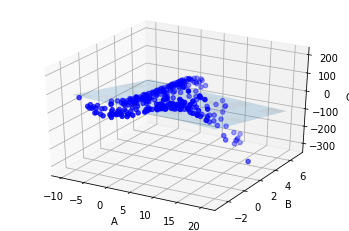

In [28]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c = 'b', marker='o')

x_lim = np.linspace(-10,20,10)
y_lim = np.linspace(-2,7,10)
xx, yy = np.meshgrid(x_lim, y_lim)
zz = w[0] * xx + w[1] * yy + w[2] * np.ones_like(xx)
ax.plot_surface(xx, yy, zz, alpha=0.2)

ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('C')
plt.show()

After removing the most significant (|z-score| >= 4) outlier(s) in the original data, we can see that our model seems to be underfitting the data based on the plot below. There appears to be a curve in the data that the model is missing, so we will increase the complexity of the model by introducing polynomial features. 

In [29]:
# Get row indices of observations that are extreme outliers (based on z-score) in any of the 3 dimensions
def z_score(x):
    mean = np.mean(x, axis = 0)
    std = np.std(x, axis = 0)
    z = (x - mean) / std
    outliers = list(np.argwhere(np.logical_or(z >= 4, z <= -4)))
    return np.array([row for row, col in outliers])

In [30]:
outliers = z_score(df)

In [31]:
df_no_outliers = np.delete(df, outliers, axis = 0)
X_no_outliers = df_no_outliers[:, :2]
X_no_outliers = np.hstack((X_no_outliers, np.ones((X_no_outliers.shape[0], 1))))
y_no_outliers = df_no_outliers[:, 2]

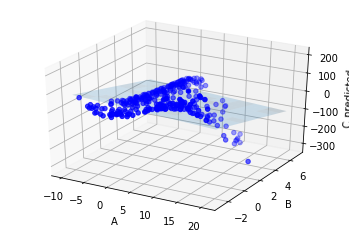

In [32]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X_no_outliers[:, 0], X_no_outliers[:, 1], y_no_outliers, c = 'b', marker='o')

x_lim = np.linspace(-10,20,10)
y_lim = np.linspace(-2,7,10)

xx, yy = np.meshgrid(x_lim, y_lim)
zz = w[0] * xx + w[1] * yy + w[2] * np.ones_like(xx)
ax.plot_surface(xx, yy, zz, alpha=0.2)
ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('C_predicted')
plt.show()

In [33]:
y_hat = X_no_outliers @ w
mse = np.mean((y_no_outliers - y_hat) ** 2)
mse

3072.184201081776

#### Model 2
I introduced polynomial terms (for both features, A and B) in order to fit the data better. We can see in the plot below that the model does seem to capture more of the curvature in the data and achieves a smaller MSE than Model 1 (likely without overfitting). If I had access to an ML library, I would perform k-fold cross-validation to further analyze whether the model is overfitting or not, but this model with polynomial features seems to fit the data relatively well. 

In [34]:
X = df_no_outliers[:, :2]
X = np.hstack((X, np.ones((X.shape[0], 1))))
y = df_no_outliers[:, 2]
#X_polynomial = np.hstack((X[:, 0].reshape((X.shape[0], 1)) ** 2, X))
X_polynomial = np.hstack((X[:, 0].reshape((X.shape[0], 1)) ** 2, X[:, 1].reshape((X.shape[0], 1)) ** 2, X))

In [35]:
w = least_squares(X_polynomial, y)
w

array([ -0.3027298 ,   0.73377777,   1.03317157, -18.5942478 ,
        28.84786985])

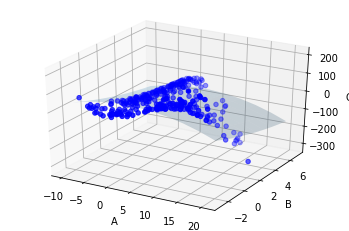

In [36]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(df_no_outliers[:, 0], df_no_outliers[:, 1], df_no_outliers[:, 2], c = 'b', marker='o')

x_lim = np.linspace(-10,20,10)
y_lim = np.linspace(-2,7,10)
xx, yy = np.meshgrid(x_lim, y_lim)
zz = w[0] * xx ** 2 + w[1] * yy ** 2 + w[2] * xx + w[3] * yy + w[4] * np.ones_like(xx)
ax.plot_surface(xx, yy, zz, alpha=0.2)

ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('C')
plt.show()

In [38]:
y_hat = X_polynomial @ w
mse = np.mean((y - y_hat) ** 2)
mse

2939.955574567659